In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [79]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


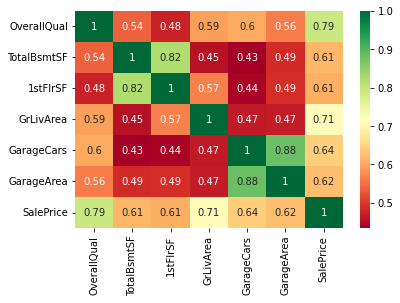

In [4]:
# most correlated features
corr = df.corr()
top_corr_features = corr.index[abs(corr["SalePrice"])>0.6]
# top_corr_features = corr.index[abs(corr["SalePrice"])>0.4]
plt.figure(figsize=(6,4))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [5]:
df1 = df[['SalePrice','OverallQual', 'TotalBsmtSF','GrLivArea', 'GarageCars']]

In [6]:
df1.to_csv('check1.csv',index=False)

c:\users\ngloo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

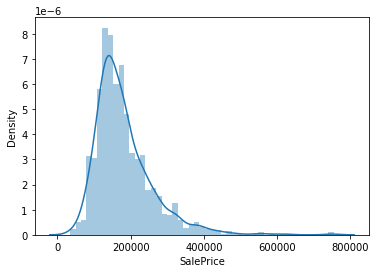

In [7]:
sns.distplot(df1['SalePrice'])

In [8]:
df1['SalePrice'].skew()

1.8828757597682129

In [9]:
df1.head(5)

,SalePrice,OverallQual,TotalBsmtSF,GrLivArea,GarageCars
0,208500,7,856,1710,2
1,181500,6,1262,1262,2
2,223500,7,920,1786,2
3,140000,7,756,1717,3
4,250000,8,1145,2198,3


In [10]:
df2 = df1.copy()

In [11]:
num_features=['SalePrice','OverallQual', 'TotalBsmtSF','GrLivArea', 'GarageCars']

for feature in num_features:
    df2[feature]=np.log(df2[feature])

c:\users\ngloo\appdata\local\programs\python\python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
df2.head(5)

,SalePrice,OverallQual,TotalBsmtSF,GrLivArea,GarageCars
0,12.247694,1.945910,6.752270,7.444249,0.693147
1,12.109011,1.791759,7.140453,7.140453,0.693147
2,12.317167,1.945910,6.824374,7.487734,0.693147
3,11.849398,1.945910,6.628041,7.448334,1.098612
4,12.429216,2.079442,7.043160,7.695303,1.098612


c:\users\ngloo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

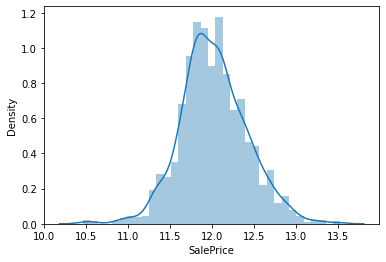

In [13]:
sns.distplot(df2['SalePrice'])

In [14]:
df2['SalePrice'].skew()

0.12133506220520406

In [15]:
X = df2[['OverallQual', 'TotalBsmtSF','GrLivArea', 'GarageCars']]
y = df2['SalePrice']

In [16]:
df2.to_csv('check_2.csv',index=False)

In [17]:
from sklearn import linear_model

In [18]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [19]:
print(df1.isnull().sum())

SalePrice      0
OverallQual    0
TotalBsmtSF    0
GrLivArea      0
GarageCars     0
dtype: int64


In [20]:
for feature in num_features:
    count = (df1[feature] == 0).sum()
    print("Count of zeros in {} is {}".format(feature, count))

Count of zeros in SalePrice is 0
Count of zeros in OverallQual is 0
Count of zeros in TotalBsmtSF is 37
Count of zeros in GrLivArea is 0
Count of zeros in GarageCars is 81


c:\users\ngloo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GarageCars', ylabel='Density'>

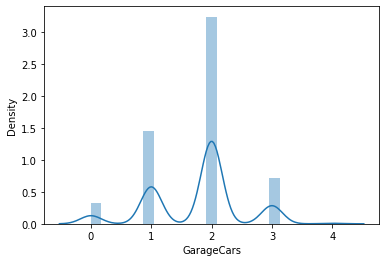

In [21]:
sns.distplot(df1['GarageCars'])

In [25]:
df1['GarageCars']=df1['GarageCars']+1

C:\Users\ngloo\AppData\Local\Temp/ipykernel_10732/905879482.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['GarageCars']=df1['GarageCars']-1


c:\users\ngloo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GarageCars', ylabel='Density'>

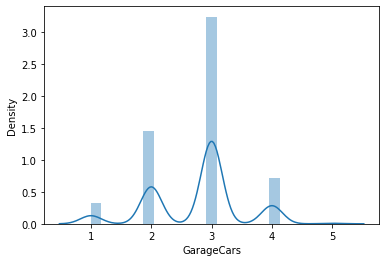

In [26]:
sns.distplot(df1['GarageCars'])

In [27]:
df1['TotalBsmtSF']=df1['TotalBsmtSF']+1

C:\Users\ngloo\AppData\Local\Temp/ipykernel_10732/3315358108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['TotalBsmtSF']=df1['TotalBsmtSF']+1


c:\users\ngloo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='Density'>

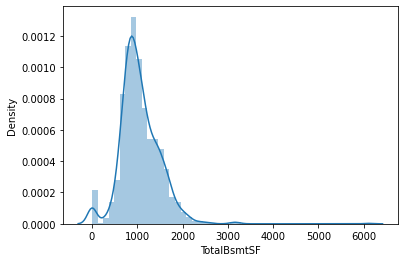

In [28]:
sns.distplot(df1['TotalBsmtSF'])

In [29]:
df2 = df1.copy()

In [30]:
num_features=['SalePrice','OverallQual', 'TotalBsmtSF','GrLivArea', 'GarageCars']

for feature in num_features:
    df2[feature]=np.log(df2[feature])

In [31]:
df2.head(5)

,SalePrice,OverallQual,TotalBsmtSF,GrLivArea,GarageCars
0,12.247694,1.945910,6.753438,7.444249,1.098612
1,12.109011,1.791759,7.141245,7.140453,1.098612
2,12.317167,1.945910,6.825460,7.487734,1.098612
3,11.849398,1.945910,6.629363,7.448334,1.386294
4,12.429216,2.079442,7.044033,7.695303,1.386294


c:\users\ngloo\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

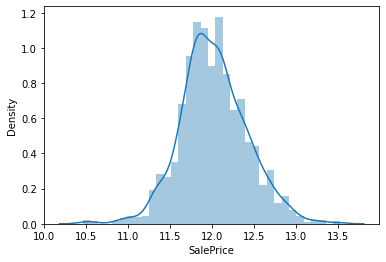

In [32]:
sns.distplot(df2['SalePrice'])

In [33]:
df2['SalePrice'].skew()

0.12133506220520406

In [34]:
X = df2[['OverallQual', 'TotalBsmtSF','GrLivArea', 'GarageCars']]
y = df2['SalePrice']


In [35]:
df2.to_csv('check3.csv',index=False)

In [36]:
df1.corr()

,SalePrice,OverallQual,TotalBsmtSF,GrLivArea,GarageCars
SalePrice,1.000000,0.790982,0.613581,0.708624,0.640409
OverallQual,0.790982,1.000000,0.537808,0.593007,0.600671
TotalBsmtSF,0.613581,0.537808,1.000000,0.454868,0.434585
GrLivArea,0.708624,0.593007,0.454868,1.000000,0.467247
GarageCars,0.640409,0.600671,0.434585,0.467247,1.000000


In [37]:
X = df2[['OverallQual', 'TotalBsmtSF','GrLivArea', 'GarageCars']]
y = df2['SalePrice']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [39]:
print(len(X_train))

1022


In [40]:
print(len(X_test))

438


In [41]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [42]:
predictions = lm.predict(X_test)

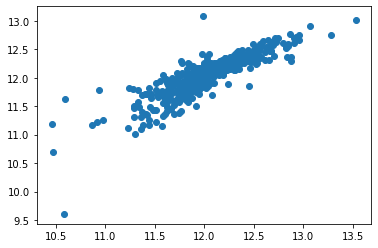

In [43]:
plt.scatter(y_test,predictions)

In [44]:
import heapq

In [45]:
heapq.nlargest(10, df2['SalePrice'])

[13.534473028231162,
 13.521139497361697,
 13.345506928718539,
 13.323926946863102,
 13.275827535915461,
 13.229567991666638,
 13.226723392728571,
 13.195613839143922,
 13.1260306447518,
 13.091904169919621]

In [46]:
import statistics

In [48]:
print(statistics.mean(df2['SalePrice']))

12.024050901109383


In [49]:
print(statistics.mean(df2['SalePrice']))

12.024050901109383


In [50]:
print(statistics.mean(df2['SalePrice'])+3*statistics.stdev(df2['SalePrice']))

13.222406505892877


In [52]:
print(statistics.mean(df2['SalePrice'])-3*statistics.stdev(df2['SalePrice']))

10.82569529632589


In [53]:
print(len(df1))

1460


In [54]:
df3=df2.loc[df2['SalePrice'] < 13.222406505892877]

In [55]:
df3=df3.loc[df3['SalePrice'] > 10.82569529632589]

In [56]:
print(len(df3))

1448


In [57]:
X = df3[['OverallQual', 'TotalBsmtSF','GrLivArea', 'GarageCars']]
y = df3['SalePrice']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [59]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
predictions = lm.predict(df_test)

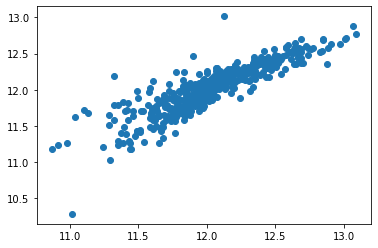

In [61]:
plt.scatter(y_test,predictions)

In [62]:
lm.coef_

array([0.716395  , 0.03860688, 0.38397286, 0.28302045])

In [63]:
r_sq = lm.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7679576729300763


In [64]:
r_sq = lm.score(X_test, y_test)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7777134955421001


In [65]:
!pip install statsmodels

  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0


You should consider upgrading via the 'c:\users\ngloo\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [66]:
!pip install termcolor

Using legacy 'setup.py install' for termcolor, since package 'wheel' is not installed.
    Running setup.py install for termcolor: started
    Running setup.py install for termcolor: finished with status 'done'


You should consider upgrading via the 'c:\users\ngloo\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [67]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)


In [68]:
# clf = sm.OLS(y_train, sm.add_constant(X_train))
clf =sm.OLS(y_train,X_train)

classifier = clf.fit()

y_pred = classifier.predict(X_test)

print(classifier.summary2())


                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.767    
Dependent Variable: SalePrice        AIC:                -570.3772
Date:               2022-07-31 13:48 BIC:                -545.7739
No. Observations:   1013             Log-Likelihood:     290.19   
Df Model:           4                F-statistic:        834.0    
Df Residuals:       1008             Prob (F-statistic): 6.84e-318
R-squared:          0.768            Scale:              0.033178 
--------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
const         7.4176     0.1386   53.5318   0.0000   7.1457   7.6895
OverallQual   0.7164     0.0350   20.4686   0.0000   0.6477   0.7851
TotalBsmtSF   0.0386     0.0054    7.1278   0.0000   0.0280   0.0492
GrLivArea     0.3840     0.0220   17.4379   0.0000   0.3408   0.4272

In [70]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(y_test, y_pred)
coefficient_of_dermination

0.7777134955420997

In [71]:
y_train_pred = classifier.predict(X_train)


In [72]:
coefficient_of_dermination_train = r2_score(y_train, y_train_pred)

In [73]:
coefficient_of_dermination_train

0.7679576729300768

In [74]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [83]:
test = df_test[['OverallQual', 'TotalBsmtSF','GrLivArea', 'GarageCars']]
test.head()

,OverallQual,TotalBsmtSF,GrLivArea,GarageCars
0,5,882.0,896,1.0
1,6,1329.0,1329,1.0
2,5,928.0,1629,2.0
3,6,926.0,1604,2.0
4,8,1280.0,1280,2.0


In [85]:
print(test.isnull().sum())

OverallQual    0
TotalBsmtSF    1
GrLivArea      0
GarageCars     1
dtype: int64


In [89]:
test.fillna(0, inplace=True)

c:\users\ngloo\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:5171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [90]:
print(test.isnull().sum())

OverallQual    0
TotalBsmtSF    0
GrLivArea      0
GarageCars     0
dtype: int64


In [86]:
for feature in ['OverallQual', 'TotalBsmtSF','GrLivArea', 'GarageCars']:
    count = (test[feature] == 0).sum()
    print("Count of zeros in {} is {}".format(feature, count))

Count of zeros in OverallQual is 0
Count of zeros in TotalBsmtSF is 41
Count of zeros in GrLivArea is 0
Count of zeros in GarageCars is 76


In [91]:
test['TotalBsmtSF']=test['TotalBsmtSF']+1

C:\Users\ngloo\AppData\Local\Temp/ipykernel_10732/1481694731.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['TotalBsmtSF']=test['TotalBsmtSF']+1


In [94]:
test['GarageCars']=test['GarageCars']+1

C:\Users\ngloo\AppData\Local\Temp/ipykernel_10732/357221578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['GarageCars']=test['GarageCars']+1


In [95]:
for feature in ['OverallQual', 'TotalBsmtSF','GrLivArea', 'GarageCars']:
    count = (test[feature] == 0).sum()
    print("Count of zeros in {} is {}".format(feature, count))

Count of zeros in OverallQual is 0
Count of zeros in TotalBsmtSF is 0
Count of zeros in GrLivArea is 0
Count of zeros in GarageCars is 0


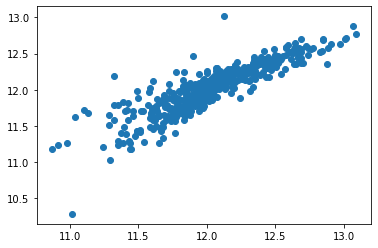

In [102]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)


In [103]:
r_sq = lm.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7679576729300764


In [104]:
r_sq = lm.score(X_test, y_test)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7777134955421002


In [ ]:
sub = pd.DataFrame()
sub['Id'] = df_test['Id']
sub['SalePrice'] = predictions
sub.to_csv('submission.csv',index=False)